In [2]:
import pandas as pd
from darts.timeseries import TimeSeries
pd.options.display.float_format = '{:.0f}'.format


Python(93859) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [1]:
import torch

In [15]:
a = torch.Tensor([[[1]],[[1]],[[1]],[[1]],[[1]],[[1]],[[1]],[[1]]])
b = torch.Tensor([[1],[1],[1],[1],[1],[1],[1],[1]])

torch.reshape(b, a.shape)

tensor([[[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]],

        [[1.]]])

In [23]:
pv_05 = pd.read_csv('../data/2023_05_cleaned_pv.csv', parse_dates=True).set_index('readingdate')
pv_06 = pd.read_csv('../data/2023_06_cleaned_pv.csv', parse_dates=True).set_index('readingdate')
pv_07 = pd.read_csv('../data/2023_07_cleaned_pv.csv', parse_dates=True).set_index('readingdate')

pv_05.index = pd.to_datetime(pv_05.index)
pv_06.index = pd.to_datetime(pv_06.index)
pv_07.index = pd.to_datetime(pv_07.index)


pv05_ts = TimeSeries.from_dataframe(pv_05)

The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


In [26]:

pv05_ts.split_after(len(pv05_ts)-(input_chunk_length+output_chunk_length)-1)

(<TimeSeries (DataArray) (readingdate: 2208, component: 1, sample: 1)> Size: 18kB
 array([[[257793.]],
 
        [[252701.]],
 
        [[232189.]],
 
        ...,
 
        [[352951.]],
 
        [[332092.]],
 
        [[312514.]]])
 Coordinates:
   * readingdate  (readingdate) datetime64[ns] 18kB 2023-04-30T22:15:00 ... 20...
   * component    (component) object 8B 'gross'
 Dimensions without coordinates: sample
 Attributes:
     static_covariates:  None
     hierarchy:          None,
 <TimeSeries (DataArray) (readingdate: 768, component: 1, sample: 1)> Size: 6kB
 array([[[  300518.]],
 
        [[  297836.]],
 
        [[  279200.]],
 
        [[  268322.]],
 
        [[  258953.]],
 
        [[  251950.]],
 
        [[  239153.]],
 
        [[  234724.]],
 
        [[  218990.]],
 
        [[  220346.]],
 
 ...
 
        [[  373444.]],
 
        [[  374562.]],
 
        [[  383919.]],
 
        [[  378687.]],
 
        [[  368686.]],
 
        [[  357519.]],
 
        [[  362187.]]

In [3]:
weather_forecast_features= [ 'wind_speed_10m', 'grad_accum_ground_0m', 'pres_instant_ground_0m', 't_instant_ground_2m', 'r_instant_ground_2m', 'valid_datetime' ]
weather_actuals_features= [ 'wind_speed', 'global_radiation', 'air_pressure', 'air_temperature', 'relative_humidity', 'datetime_from' ]

wa = pd.read_csv('../data/2023-04_to_08-amsterdam-actuals.csv', parse_dates=True, usecols=weather_actuals_features).set_index('datetime_from')
wf = pd.read_csv('../data/2023_weather_data_06_run_summer_from_04_to_08.csv',parse_dates=True, usecols=weather_forecast_features).set_index('valid_datetime')

wf.index = pd.to_datetime(wf.index)
wa.index = pd.to_datetime(wa.index)

print(wf.loc[wf.isna().any(axis=1)])
wa.loc[wa.isna().any(axis=1)]
# wind_speed	air_temperature	relative_humidity	air_pressure	global_radiation
# 23, 10, 10  14 7 


Empty DataFrame
Columns: [wind_speed_10m, t_instant_ground_2m, pres_instant_ground_0m, r_instant_ground_2m, grad_accum_ground_0m]
Index: []


,wind_speed,air_temperature,relative_humidity,air_pressure,global_radiation
datetime_from,,,,,
2023-05-03 12:20:00,NaN,NaN,NaN,NaN,NaN
2023-05-03 12:30:00,NaN,NaN,NaN,NaN,NaN
2023-05-03 12:40:00,NaN,NaN,NaN,NaN,NaN
2023-05-03 12:50:00,NaN,NaN,NaN,NaN,NaN
2023-05-23 09:50:00,7,NaN,NaN,102400,235200
2023-05-23 10:00:00,7,287,1,102400,NaN
2023-07-06 08:40:00,NaN,292,1,NaN,196200
2023-07-06 08:50:00,NaN,292,1,NaN,258600
2023-07-06 09:00:00,NaN,292,1,NaN,363600


In [14]:
[ print(round(100*(i/13221), 5)) for i in [23, 10, 10, 14, 7 ]]
len(wa)

100*(sum([23, 10, 10, 14, 7 ]) / 13221)

0.17397
0.07564
0.07564
0.10589
0.05295


0.48407836018455486

In [11]:
wa = wa.reset_index(drop=False)
wa[(wa['datetime_from'] > '2023-05-01') & (wa['datetime_from'] < '2023-08-01')]

,index,datetime_from,wind_speed,air_temperature,relative_humidity,air_pressure,global_radiation
4320,4320,2023-05-01 00:10:00,3,283,1,101831,0
4321,4321,2023-05-01 00:20:00,3,283,1,101811,0
4322,4322,2023-05-01 00:30:00,3,283,1,101801,0
4323,4323,2023-05-01 00:40:00,3,283,1,101791,0
4324,4324,2023-05-01 00:50:00,3,283,1,101781,0
...,...,...,...,...,...,...,...
17536,17536,2023-07-31 23:10:00,4,289,1,99862,0
17537,17537,2023-07-31 23:20:00,4,289,1,99842,0
17538,17538,2023-07-31 23:30:00,3,289,1,99822,0
17539,17539,2023-07-31 23:40:00,4,290,1,99822,0


In [54]:
wf_ts = TimeSeries.from_dataframe(wf)
wa_ts = TimeSeries.from_dataframe(wa, freq='10min')

The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


In [55]:
from darts.utils.missing_values import fill_missing_values

filled_wa_ts = fill_missing_values(wa_ts, fill='auto')
filled_wa_ts.to_csv('../data/2023-04_to_08-amsterdam-actuals_filled_gaps.csv')



,datetime_from,wind_speed,air_temperature,relative_humidity,air_pressure,global_radiation
4681,2023-05-03 12:20:00,NaN,NaN,NaN,NaN,NaN
4682,2023-05-03 12:30:00,NaN,NaN,NaN,NaN,NaN
4683,2023-05-03 12:40:00,NaN,NaN,NaN,NaN,NaN
4684,2023-05-03 12:50:00,NaN,NaN,NaN,NaN,NaN
7543,2023-05-23 09:50:00,7,NaN,NaN,102400,235200
7544,2023-05-23 10:00:00,7,287,1,102400,NaN
13871,2023-07-06 08:40:00,NaN,292,1,NaN,196200
13872,2023-07-06 08:50:00,NaN,292,1,NaN,258600
13873,2023-07-06 09:00:00,NaN,292,1,NaN,363600
13874,2023-07-06 09:10:00,NaN,292,1,NaN,190200


In [21]:
pv_06.describe()

,gross
count,2880
mean,-192508
std,553286
min,-1434713
25%,-631188
50%,78787
75%,235712
max,453027


<Axes: xlabel='readingdate'>

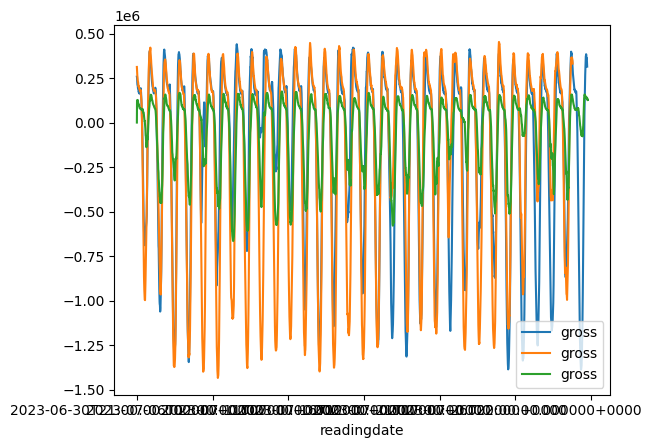

In [17]:
ax = pv_05.plot()
pv_06.plot(ax=ax)
pv_07.plot(ax=ax)